# Import Data and Metadata

In [1]:
# import modules
import pandas as pd

In [2]:
# import data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
777,"GD2 44:1;3 (LCB 18:1;2-2H2O,LCB 18:0;3-3H2O)",0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2714,LPC O-30:1 (PC),0.0,0.0,0.0,30.2435,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,166.9892,30.6387,0.0,0.0,0.0,0.0,0.0,0.0
2794,PC O-34:4 (PC 104),0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,36.3848,24.7272,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
4158,TAG 34:0+NH4 (-FA 13:0 (NH4)),TAG,34,0
3911,SM 44:1;4 (LCB 18:0;2-2H2O),SM,44,1
1729,NAPE 38:5+NH4 (-NAPE (18:2 NH4)),NAPE,38,5


In [4]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.head()

,Exp,Mutation
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


# Get Head Groups

In [5]:
# join to row metadata
h = df_meta[['Sample Name', 'Head Group']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [6]:
# get percentage of each head group per sample
h = h.groupby('Head Group').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group,,,,,,,,,,,,,,,,,,,,,
DAG,3.792345,5.088316,4.726495,6.441999,2.970056,2.287684,4.640503,4.684304,4.436426,4.475044,...,6.201760,5.990295,4.840006,3.236292,4.226487,4.474205,2.467662,2.213243,2.327195,2.823576
DMPE,0.017159,0.017337,0.019405,0.019511,0.018916,0.013465,0.018452,0.020581,0.018957,0.018445,...,0.039745,0.032853,0.018820,0.019316,0.022869,0.024113,0.029852,0.029169,0.027921,0.028282
DMPE O,0.013059,0.014961,0.013895,0.015188,0.006265,0.006062,0.008710,0.008280,0.007675,0.008107,...,0.036104,0.029234,0.009971,0.012856,0.010783,0.011114,0.012118,0.011552,0.012132,0.010032
GD1,0.012834,0.014724,0.012762,0.011956,0.012158,0.000746,0.016397,0.019126,0.009975,0.007319,...,0.020490,0.019406,0.014096,0.008895,0.010200,0.009214,0.007525,0.007693,0.009886,0.008036
GD2,0.034481,0.030482,0.031470,0.029213,0.055505,0.052106,0.045884,0.050735,0.042910,0.047433,...,0.023427,0.022258,0.019093,0.025866,0.011349,0.011332,0.030187,0.033663,0.033589,0.032014


In [8]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('Exp').merge(df_exps, on='Exp')
h.head()

,Exp,DAG,DMPE,DMPE O,GD1,GD2,GD3,GM1,GM2,GM3,...,PC,PC O,PE,PE O,PG,PG O,SGalCer,SM,TAG,Mutation
0,CAS9-A,3.792345,0.017159,0.013059,0.012834,0.034481,0.083266,0.075666,0.233861,0.361547,...,29.859562,15.946745,9.634853,2.499041,0.240836,0.186635,0.108403,20.007093,3.412938,CAS9
1,CAS9-A.1,5.088316,0.017337,0.014961,0.014724,0.030482,0.074624,0.071986,0.252905,0.413482,...,28.972766,15.484959,9.742098,2.501017,0.240002,0.186657,0.104967,19.675334,3.440674,CAS9
2,CAS9-B,4.726495,0.019405,0.013895,0.012762,0.031470,0.073038,0.069935,0.235152,0.335018,...,28.769176,16.096228,9.868793,2.612379,0.233798,0.178392,0.105891,20.993509,3.076512,CAS9
3,CAS9-B.1,6.441999,0.019511,0.015188,0.011956,0.029213,0.051325,0.062555,0.157795,0.314692,...,29.960199,16.803581,9.324914,2.383124,0.223080,0.162924,0.092522,19.234354,2.984436,CAS9
4,CAV_A,2.970056,0.018916,0.006265,0.012158,0.055505,0.089175,0.103540,0.163990,0.286156,...,33.259082,11.970882,14.962765,4.236793,0.437112,0.597114,0.132696,19.754895,3.140720,CAV


In [9]:
# drop head groups where all values are zero
h = h.loc[:, (h!=0).any(axis=0)]

In [11]:
# convert to long format
h = h[h.columns[1:]].melt('Mutation', var_name='Head Group', value_name='Percentage')
h.head()

,Mutation,Head Group,Percentage
0,CAS9,DAG,3.792345
1,CAS9,DAG,5.088316
2,CAS9,DAG,4.726495
3,CAS9,DAG,6.441999
4,CAV,DAG,2.970056


In [12]:
# remove RAJU
h = h[h['Mutation'] != 'RAJU']

In [13]:
h[(h['Head Group'] == 'MAG') & (h['Percentage'] != 0)]

,Mutation,Head Group,Percentage
1054,CAV,MAG,0.008133
1055,CAV,MAG,0.010998
1056,CAV,MAG,0.007264
1057,CAV,MAG,0.007360


# Donut charts for each protein/mutation

In [14]:
# import modules
import altair as alt

In [15]:
len(h['Head Group'].unique())

38

In [16]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in h['Mutation'].unique():
    source = h[h['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Percentage):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='rainbow'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Percentage)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
# d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
# d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/head_group_graphs/HeadGroupDonutCharts_interactive.html')
# d

d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:]) & heads
d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
d

alt.VConcatChart(...)

# Donut charts, without PE/PC head groups

In [17]:
# join to row metadata
h = df_meta[['Sample Name', 'Head Group']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [18]:
# remove PC/PE
h = h[~h['Head Group'].isin(['PE', 'PE O', 'PC', 'PC O'])]

In [19]:
# get percentage of each head group per sample
h = h.groupby('Head Group').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group,,,,,,,,,,,,,,,,,,,,,
DAG,9.016554,11.751536,11.081163,15.512356,8.349778,6.530811,11.715031,12.097181,9.838069,10.178959,...,18.904095,16.651577,10.699033,7.196119,9.358901,9.603678,4.834055,4.284842,4.557950,5.333773
DMPE,0.040796,0.040040,0.045495,0.046982,0.053178,0.038440,0.046583,0.053150,0.042038,0.041954,...,0.121151,0.091323,0.041603,0.042951,0.050640,0.051758,0.058478,0.056471,0.054686,0.053425
DMPE O,0.031049,0.034552,0.032577,0.036572,0.017613,0.017307,0.021988,0.021383,0.017020,0.018440,...,0.110052,0.081263,0.022042,0.028586,0.023878,0.023857,0.023738,0.022366,0.023761,0.018951
GD1,0.030513,0.034004,0.029920,0.028791,0.034179,0.002130,0.041395,0.049394,0.022119,0.016647,...,0.062456,0.053944,0.031160,0.019778,0.022587,0.019778,0.014742,0.014893,0.019362,0.015180
GD2,0.081980,0.070399,0.073780,0.070346,0.156041,0.148751,0.115836,0.131022,0.095156,0.107892,...,0.071410,0.061871,0.042205,0.057516,0.025131,0.024323,0.059135,0.065172,0.065786,0.060475


In [21]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('Exp').merge(df_exps, on='Exp')
h.head()

,Exp,DAG,DMPE,DMPE O,GD1,GD2,GD3,GM1,GM2,GM3,...,MAG,MMPE,MMPE O,NAPE,PG,PG O,SGalCer,SM,TAG,Mutation
0,CAS9-A,9.016554,0.040796,0.031049,0.030513,0.081980,0.197971,0.179901,0.556021,0.859602,...,0.000000,0.057371,0.041088,5.168129,0.572603,0.443737,0.257735,47.568208,8.114490,CAS9
1,CAS9-A.1,11.751536,0.040040,0.034552,0.034004,0.070399,0.172345,0.166252,0.584087,0.954943,...,0.000000,0.050120,0.035560,5.130392,0.554288,0.431088,0.242423,45.440453,7.946283,CAS9
2,CAS9-B,11.081163,0.045495,0.032577,0.029920,0.073780,0.171237,0.163960,0.551308,0.785443,...,0.000000,0.050703,0.037683,5.288315,0.548135,0.418237,0.248259,49.218813,7.212815,CAS9
3,CAS9-B.1,15.512356,0.046982,0.036572,0.028791,0.070346,0.123591,0.150633,0.379970,0.757779,...,0.000000,0.046321,0.043567,5.294908,0.537177,0.392321,0.222792,46.316388,7.186533,CAS9
4,CAV_A,8.349778,0.053178,0.017613,0.034179,0.156041,0.250699,0.291083,0.461029,0.804478,...,0.022863,0.067405,0.019900,4.103800,1.228862,1.678678,0.373051,55.537334,8.829570,CAV


In [ ]:
# drop head groups where all values are zero
h = h.loc[:, (h!=0).any(axis=0)]

In [22]:
# convert to long format
h = h[h.columns[1:]].melt('Mutation', var_name='Head Group', value_name='Percentage')
h.head()

,Mutation,Head Group,Percentage
0,CAS9,DAG,9.016554
1,CAS9,DAG,11.751536
2,CAS9,DAG,11.081163
3,CAS9,DAG,15.512356
4,CAV,DAG,8.349778


In [23]:
# remove RAJU
h = h[h['Mutation'] != 'RAJU']

In [24]:
len(h['Head Group'].unique())

34

In [27]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in h['Mutation'].unique():
    source = h[h['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Percentage):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='rainbow'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Percentage)']
    ).add_params(click).properties(
        width=400,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/head_group_graphs/HeadGroupDonutCharts_interactive.html')
d

alt.VConcatChart(...)

# Donut charts, without PE/PC head groups, combine similar head groups

In [28]:
# add combined head groups to df_meta
hg_list = df_meta['Head Group'].unique()
hg2_list = []
for hg in hg_list:
    # first sort the O groups (ex: PC, PC O)
    if " " in hg:
        hg2 = hg.split(" ")[0] 
        
    # sort the 1/2/3 groups(GD, GT)
    elif hg[-1] in ['1', '2', '3']:
        hg2 = hg[:-1]
    
    # get the hexcer
    elif 'Hex' in hg:
        hg2 = 'Hex_Cer'
        
    # get the acylglycerols
    elif hg in 'DAG,TAG,MAG':
        hg2='DAG,TAG,MAG'
    
    # all others    
    else:
        hg2 = hg
        
    hg2_list.append(hg2)
    
df_hg = pd.DataFrame({'Head Group': hg_list, 'Head Group 2': hg2_list})
df_hg.sort_values('Head Group').sample(3)

,Head Group,Head Group 2
5,GD1,GD
17,LDMPE O,LDMPE
33,SM,SM


In [29]:
df_meta2 = df_meta.merge(df_hg, on='Head Group')
df_meta2.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,Hex_Cer
2,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,Hex_Cer
3,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,Hex_Cer
4,Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer,26,0,Hex_Cer


In [31]:
# join to row metadata
h = df_meta2[['Sample Name', 'Head Group 2']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group 2,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex_Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex_Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex_Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [32]:
# remove PC/PE
h = h[~h['Head Group 2'].isin(['PE', 'PC'])]

In [33]:
# get percentage of each head group per sample
h = h.groupby('Head Group 2').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group 2,,,,,,,,,,,,,,,,,,,,,
"DAG,TAG,MAG",17.131045,19.697819,18.293978,22.698889,17.202211,15.332804,16.337999,16.766061,16.090207,16.436541,...,23.198733,20.504403,14.379887,11.013576,16.490389,16.745664,11.514577,10.991416,11.646469,11.812668
DMPE,0.071845,0.074592,0.078072,0.083553,0.070792,0.055747,0.068571,0.074534,0.059058,0.060395,...,0.231203,0.172586,0.063645,0.071537,0.074518,0.075615,0.082216,0.078836,0.078447,0.072377
GD,0.310464,0.276748,0.274937,0.222728,0.440919,0.418031,0.504274,0.530454,0.337820,0.325467,...,0.307344,0.249818,0.317303,0.347922,0.236874,0.210704,0.253597,0.253347,0.248158,0.227712
GM,1.595524,1.705282,1.500711,1.288382,1.556590,1.196701,1.934588,2.045465,1.274933,1.219760,...,0.790340,0.653810,1.468698,1.557666,1.282061,1.194746,1.063103,1.032200,1.114497,1.033965
GT,0.095354,0.097978,0.097972,0.085562,0.141355,0.095224,0.132533,0.148010,0.102469,0.102080,...,0.120182,0.103658,0.061813,0.059446,0.039733,0.034684,0.069381,0.081565,0.073407,0.069426


In [35]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('Exp').merge(df_exps, on='Exp')
h.head()

,Exp,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,SM,Mutation
0,CAS9-A,17.131045,0.071845,0.310464,1.595524,0.095354,1.599846,0.004377,0.007062,0.451646,0.030991,0.0,24.592975,0.098459,5.168129,1.016339,0.257735,47.568208,CAS9
1,CAS9-A.1,19.697819,0.074592,0.276748,1.705282,0.097978,1.719226,0.003752,0.006104,0.332530,0.030998,0.0,24.170648,0.085680,5.130392,0.985375,0.242423,45.440453,CAS9
2,CAS9-B,18.293978,0.078072,0.274937,1.500711,0.097972,1.559858,0.002400,0.003472,0.440166,0.032185,0.0,21.906104,0.088386,5.288315,0.966372,0.248259,49.218813,CAS9
3,CAS9-B.1,22.698889,0.083553,0.222728,1.288382,0.085562,1.280390,0.003360,0.003690,0.439159,0.022190,0.0,21.018622,0.089887,5.294908,0.929498,0.222792,46.316388,CAS9
4,CAV_A,17.202211,0.070792,0.440919,1.556590,0.141355,1.546513,0.012363,0.010246,1.388829,0.148742,0.0,14.472412,0.087304,4.103800,2.907540,0.373051,55.537334,CAV


In [36]:
# convert to long format
h_long = h[h.columns[1:]].melt('Mutation', var_name='Head Group', value_name='Percentage')
h_long.head()

,Mutation,Head Group,Percentage
0,CAS9,"DAG,TAG,MAG",17.131045
1,CAS9,"DAG,TAG,MAG",19.697819
2,CAS9,"DAG,TAG,MAG",18.293978
3,CAS9,"DAG,TAG,MAG",22.698889
4,CAV,"DAG,TAG,MAG",17.202211


In [37]:
# remove RAJU
h_long = h_long[h_long['Mutation'] != 'RAJU']

In [38]:
len(h_long['Head Group'].unique())

17

In [41]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h_long).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in h_long['Mutation'].unique():
    source = h_long[h_long['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(Percentage):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Percentage)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
# d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
# d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
# d

d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:]) & heads
d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

alt.VConcatChart(...)

# Correlation Map of Head Groups

In [42]:
h.head()

,Exp,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,SM,Mutation
0,CAS9-A,17.131045,0.071845,0.310464,1.595524,0.095354,1.599846,0.004377,0.007062,0.451646,0.030991,0.0,24.592975,0.098459,5.168129,1.016339,0.257735,47.568208,CAS9
1,CAS9-A.1,19.697819,0.074592,0.276748,1.705282,0.097978,1.719226,0.003752,0.006104,0.332530,0.030998,0.0,24.170648,0.085680,5.130392,0.985375,0.242423,45.440453,CAS9
2,CAS9-B,18.293978,0.078072,0.274937,1.500711,0.097972,1.559858,0.002400,0.003472,0.440166,0.032185,0.0,21.906104,0.088386,5.288315,0.966372,0.248259,49.218813,CAS9
3,CAS9-B.1,22.698889,0.083553,0.222728,1.288382,0.085562,1.280390,0.003360,0.003690,0.439159,0.022190,0.0,21.018622,0.089887,5.294908,0.929498,0.222792,46.316388,CAS9
4,CAV_A,17.202211,0.070792,0.440919,1.556590,0.141355,1.546513,0.012363,0.010246,1.388829,0.148742,0.0,14.472412,0.087304,4.103800,2.907540,0.373051,55.537334,CAV


In [43]:
# remove sample column
h_corr = h.iloc[:,1:]

# drop RAJU
h_corr = h_corr[h_corr['Mutation'] != 'RAJU']
# drop WT
h_corr = h_corr[h_corr['Mutation'] != 'WT']

# set protein column as index
h_corr = h_corr.set_index('Mutation')

h_corr.head()

,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,SM
Mutation,,,,,,,,,,,,,,,,,
CAS9,17.131045,0.071845,0.310464,1.595524,0.095354,1.599846,0.004377,0.007062,0.451646,0.030991,0.0,24.592975,0.098459,5.168129,1.016339,0.257735,47.568208
CAS9,19.697819,0.074592,0.276748,1.705282,0.097978,1.719226,0.003752,0.006104,0.332530,0.030998,0.0,24.170648,0.085680,5.130392,0.985375,0.242423,45.440453
CAS9,18.293978,0.078072,0.274937,1.500711,0.097972,1.559858,0.002400,0.003472,0.440166,0.032185,0.0,21.906104,0.088386,5.288315,0.966372,0.248259,49.218813
CAS9,22.698889,0.083553,0.222728,1.288382,0.085562,1.280390,0.003360,0.003690,0.439159,0.022190,0.0,21.018622,0.089887,5.294908,0.929498,0.222792,46.316388
CAV,17.202211,0.070792,0.440919,1.556590,0.141355,1.546513,0.012363,0.010246,1.388829,0.148742,0.0,14.472412,0.087304,4.103800,2.907540,0.373051,55.537334


In [44]:
# normalize the head groups
h_corr = h_corr/h_corr.sum()
h_corr.head()

,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,SM
Mutation,,,,,,,,,,,,,,,,,
CAS9,0.030380,0.019940,0.024638,0.031857,0.028667,0.032016,0.013847,0.029493,0.016599,0.008412,0.0,0.045601,0.029471,0.019791,0.017068,0.023555,0.023657
CAS9,0.034932,0.020703,0.021963,0.034048,0.029456,0.034405,0.011869,0.025493,0.012221,0.008414,0.0,0.044818,0.025646,0.019647,0.016548,0.022156,0.022599
CAS9,0.032443,0.021668,0.021819,0.029964,0.029454,0.031216,0.007592,0.014501,0.016177,0.008736,0.0,0.040619,0.026456,0.020251,0.016229,0.022689,0.024478
CAS9,0.040255,0.023190,0.017676,0.025724,0.025724,0.025623,0.010629,0.015412,0.016140,0.006023,0.0,0.038974,0.026905,0.020277,0.015609,0.020362,0.023035
CAV,0.030507,0.019648,0.034991,0.031079,0.042497,0.030949,0.039111,0.042792,0.051043,0.040373,0.0,0.026835,0.026132,0.015715,0.048827,0.034094,0.027621


In [45]:
h_corr = h_corr.groupby('Mutation').mean().T
h_corr.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG
"DAG,TAG,MAG",0.034503,0.029101,0.030615,0.020092,0.025251,0.018440,0.026894,0.039109,0.025994
DMPE,0.021375,0.018710,0.016781,0.028458,0.026990,0.028350,0.026407,0.063131,0.019797
GD,0.021524,0.037570,0.022794,0.037238,0.031505,0.027974,0.028640,0.020678,0.022078
GM,0.030398,0.033610,0.020862,0.038824,0.029019,0.031746,0.024256,0.013816,0.027469
GT,0.028325,0.038867,0.028178,0.017102,0.026445,0.031360,0.036906,0.028110,0.014707


In [46]:
# create correlation matrix
corr = h_corr.corr()

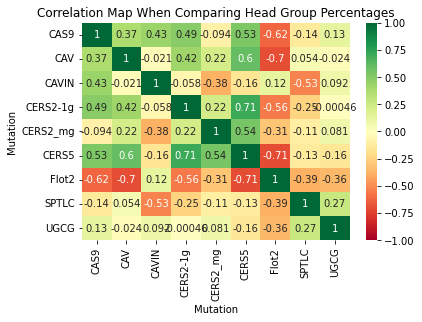

In [47]:
# plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=True).set_title('Correlation Map When Comparing Head Group Percentages')
plt.show()

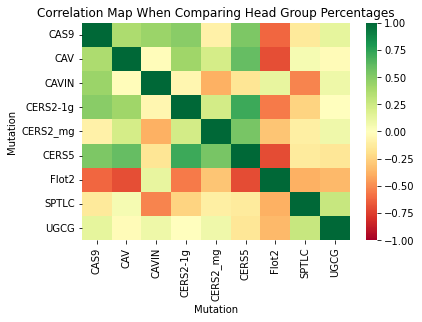

In [48]:
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn').set_title('Correlation Map When Comparing Head Group Percentages')
plt.show()

In [49]:
h.head()

,Exp,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,SM,Mutation
0,CAS9-A,17.131045,0.071845,0.310464,1.595524,0.095354,1.599846,0.004377,0.007062,0.451646,0.030991,0.0,24.592975,0.098459,5.168129,1.016339,0.257735,47.568208,CAS9
1,CAS9-A.1,19.697819,0.074592,0.276748,1.705282,0.097978,1.719226,0.003752,0.006104,0.332530,0.030998,0.0,24.170648,0.085680,5.130392,0.985375,0.242423,45.440453,CAS9
2,CAS9-B,18.293978,0.078072,0.274937,1.500711,0.097972,1.559858,0.002400,0.003472,0.440166,0.032185,0.0,21.906104,0.088386,5.288315,0.966372,0.248259,49.218813,CAS9
3,CAS9-B.1,22.698889,0.083553,0.222728,1.288382,0.085562,1.280390,0.003360,0.003690,0.439159,0.022190,0.0,21.018622,0.089887,5.294908,0.929498,0.222792,46.316388,CAS9
4,CAV_A,17.202211,0.070792,0.440919,1.556590,0.141355,1.546513,0.012363,0.010246,1.388829,0.148742,0.0,14.472412,0.087304,4.103800,2.907540,0.373051,55.537334,CAV


In [50]:
# remove sample column
h_corr2 = h.iloc[:,1:]

# drop RAJU
h_corr2 = h_corr2[h_corr2['Mutation'] != 'RAJU']
# drop WT
h_corr2 = h_corr2[h_corr2['Mutation'] != 'WT']

h_corr2 = h_corr2.groupby('Mutation').mean()
h_corr2 = h_corr2.div(h_corr2.sum(axis=1), axis=0)
h_corr2 = h_corr2/h_corr2.sum()

h_corr2.head()



# # set protein column as index
# h_corr2 = h_corr.set_index('protein')

# h_corr2.head()

,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,SGalCer,SM
Mutation,,,,,,,,,,,,,,,,,
CAS9,0.138010,0.085501,0.086095,0.121592,0.113302,0.123259,0.043937,0.084899,0.061138,0.031585,0.000000,0.170012,0.108479,0.079966,0.065454,0.088762,0.093770
CAV,0.116405,0.074838,0.150281,0.134440,0.155468,0.147484,0.102309,0.183194,0.159454,0.085575,0.000000,0.098692,0.098324,0.083320,0.175403,0.156843,0.112087
CAVIN,0.122460,0.067124,0.091176,0.083448,0.112710,0.084374,0.042888,0.131495,0.078779,0.079584,0.113729,0.167258,0.074121,0.128846,0.091688,0.093597,0.093356
CERS2-1g,0.080369,0.113834,0.148950,0.155296,0.068408,0.132011,0.040670,0.064522,0.108019,0.033664,0.027452,0.087279,0.085996,0.121478,0.102789,0.108822,0.123492
CERS2_mg,0.101005,0.107961,0.126020,0.116075,0.105779,0.110565,0.079724,0.065039,0.131605,0.190128,0.052276,0.071770,0.083700,0.090510,0.095060,0.129412,0.126996


<AxesSubplot:xlabel='Mutation', ylabel='Mutation'>

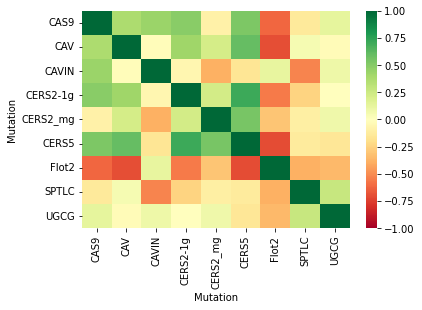

In [51]:
sns.heatmap(h_corr2.T.corr(), vmin=-1, vmax=1, cmap='RdYlGn')

# Donut Charts, normalize before PE/PC removed

In [52]:
import functions

In [53]:
# import data

In [54]:
df_meta2 = pd.read_csv('dataframes/pos_lipids_df_meta2.csv')
df_meta2.sample(1)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
2485,Hex3Cer 36:3;3 (LCB 18:0;2-2H2O),Hex3Cer,36,3,Hex_Cer,>=3


In [58]:
df_p = functions.df_p(df, df_exps)
df_p.sample(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
GD2 46:0;2 (LCB 18:0;2-H2O),22.7539,3.4206,22.7421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
hg_long = functions.norm_long(df_meta2, df_p, var='Head Group 2', renamed_var='Head Group', drop_mutation=['RAJU'])
hg_long.head()

,Mutation,Head Group,Fraction
0,CAS9,"DAG,TAG,MAG",0.072053
1,CAS9,"DAG,TAG,MAG",0.085290
2,CAS9,"DAG,TAG,MAG",0.078030
3,CAS9,"DAG,TAG,MAG",0.094264
4,CAV,"DAG,TAG,MAG",0.061189


In [70]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(hg_long).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in hg_long['Mutation'].unique():
    source = hg_long[hg_long['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title={'text':['Average Percentage of Head Group'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

# d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:]) & heads
# d = d.properties(title={'text':['Average Percentage of Head Group'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
# d

alt.VConcatChart(...)

In [67]:
hg2_long = functions.norm_long(df_meta2, 
                               df_p, 
                               var='Head Group 2', 
                               renamed_var='Head Group', 
                               drop_mutation=['RAJU'],
                               drop_var=['PE', 'PC']
                              )

In [68]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(hg2_long).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in hg2_long['Mutation'].unique():
    source = hg2_long[hg2_long['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

# d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:]) & heads
# d = d.properties(title={'text':['Average Percentage of Head Group'],  'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
# d

alt.VConcatChart(...)